
# CRIM Intervals:  Melodic and Harmonic

### What You Can Do with this Notebook:

* Show all **melodic** and **harmonic** intervals (diatonic, chromatic, and zero-based) in a piece
* Render charts of intervals
* Show **ngrams** of these melodic and harmonic intervals in a given piece
* Search for **ngrams** in one piece or a whole corpus of them

### Reminders:

#### Import Music Files

* If you are exploring pieces from CRIM, importing simply involves providing the CRIM URL of the MEI file:  

> `piece = importScore('https://crimproject.org/mei/CRIM_Model_0008.mei')`

* But you can also use the Notebook with any MEI, MusicXML, or MIDI file of your own. You can easily do this when you run the Notebooks on Jupyter Hub, you will also find a folder called `Music_Files`.  Upload the file here, then provide the path to that file: 

> `piece = importScore('Music_Files/My_File_Name.mei')`

#### Save outputs as CSV or Excel

* The Jupyter Hub version of these Notebooks also provides a folder called **`saved_csv`**.  You can save **csv** files of any data frame there with this command: 

> `notebook_data_frame_name.to_csv('saved_csv/your_file_title.csv')`
    
* If you prefer **Excel** documents (which are better for anything with a complex set of columns or hierarhical index), use **ExcelWriter**.  In the following code, you will need to provide these commands:

> `writer = pd.ExcelWriter('saved_csv/file_name.xlsx', engine='xlsxwriter')`
    
* Now convert your dataframe to Excel

> `frame_name.to_excel(writer, sheet_name='Sheet1')`
    
* And finally save the new file to the folder here in the Notebook:

>`writer.save()`

* Put the following code to a new cell and update the frame_name and file_name:

```
writer = pd.ExcelWriter('saved_csv/file_name.xlsx', engine='xlsxwriter')
frame_name.to_excel(writer, sheet_name='Sheet1')
writer.save()
```

#### Read Documentation for Each Method
- Read the documentation with this command `print(ImportedPiece.YourMethod.__doc__)`, where you will replace `'YourMethod'` with the name of the individual method, for example `print(ImportedPiece.melodic.__doc__)`


*** 

## A. Import Intervals and Other Code

* The first step is to import all the code required for the Notebook
* **`arrow/run`** or **`Shift + Enter`** in the following cell:

In [58]:
import intervals
from intervals import * 
from intervals import main_objs
import intervals.visualizations as viz
import pandas as pd
import re
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
from pandas.io.json import json_normalize
from pyvis.network import Network
from IPython.display import display
import requests
import os
import glob as glob


MYDIR = ("saved_csv")
CHECK_FOLDER = os.path.isdir(MYDIR)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(MYDIR)
    print("created folder : ", MYDIR)
else:
    print(MYDIR, "folder already exists.")
    
MUSDIR = ("Music_Files")
CHECK_FOLDER = os.path.isdir(MUSDIR)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(MUSDIR)
    print("created folder : ", MUSDIR)
else:
    print(MUSDIR, "folder already exists.")

saved_csv folder already exists.
Music_Files folder already exists.


## B. Importing a Piece

### B.1 Import a Piece

In [64]:
# Select a prefix:

# prefix = 'Music_Files/'
prefix = 'https://crimproject.org/mei/'
# Add your filename here

mei_file = 'CRIM_Model_0032.mei'

# join the strings and import piece
url = prefix + mei_file
piece = importScore(url)

print(piece.metadata)


Successfully imported https://crimproject.org/mei/CRIM_Model_0032.mei
{'title': 'Sancta et immaculata virginitas', 'composer': 'Cristóbal de Morales'}


## C. Melodic Patterns

** CRIM Intervals, as the name suggests, can tell us a lot about the **distances between notes**

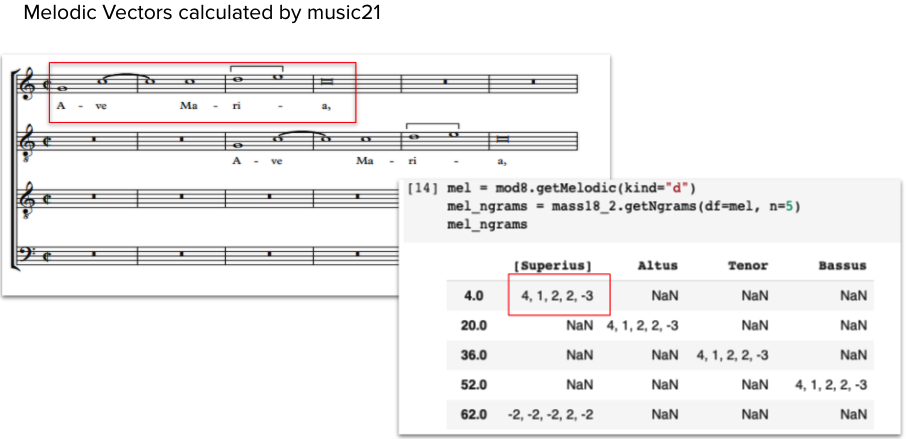


### C.1 Get the melodic intervals for each voice

**`piece.melodic(kind="d")`** is the basic method to find any type of melodic interval

Note that **`kind`** is a variable--you can change it, then run the cell to see the results.

```
q = **diatonic with 'quality'** (thus distinguishing between P8, M3, and m3 intervals)
d = **diatonic without quality** (just the interval:  8, 3)
c = **chromatic** (here a unison will be **0**, and a tritone will be **6**)
z = **zero-based** (diatonic, but with unison is represented as "0")
```
    
Compound or Simple Intervals?

    * add **compound=True** to see 10ths and 3rds as different; **compound=False** for them to be the same.  
    * For example:  
    
```
piece.melodic(kind="d", compound=True).fillna('-')
```
  
Unisons:  Keep or Combine?

    * adding `combineUnisons=True` to the request for `piece.notes()` will combine all unisons to a single note.  The total duration will be the same as for the individual notes, but now Melodic (and Ngrams) will follow the contour of the melody as if there were no repeated note. For example:  
    
```
nr = piece.notes(combineUnisons=True)
piece.melodic(df=nr, kind="d")
```

Regularize Durations?

* Setting the `unit=n` argument allows you to regularize the results.
0 is without regularization. `2` regularizes to half-note, `4` to the whole note, etc.
    
* Read the Documentation:  `print(ImportedPiece.melodic.__doc__)`
    

In [65]:
# Read the Documentation:  
print(ImportedPiece.melodic.__doc__)


        Return melodic intervals for all voice pairs. Each melodic interval
        is associated with the starting offset of the second note in the
        interval.

        * To associate intervals with the offset of the first notes,
        pass end=False.

        * If you want melodic intervals measured at a regular
        duration, do not pipe this method's result to the `regularize` method.
        Instead, pass the desired regular durational interval as an integer or
        float as the `unit` parameter.

        :param str kind: use "q" (default) for diatonic intervals with quality,
            "d" for diatonic intervals without quality, "z" for zero-indexed
            diatonic intervals without quality (i.e. unison = 0, second = 1,
            etc.), or "c" for chromatic intervals. Only the first character is
            used, and it's case insensitive.
        :param bool directed: defaults to True which shows that the voice that
            is lower on the staff is a h

In [66]:
nr = piece.notes(combineUnisons=False)
piece.melodic(df=nr, kind="d")


,Superius,Altus,Tenor,Bassus
0.0,Rest,Rest,NaN,Rest
8.0,NaN,NaN,-5,NaN
12.0,NaN,NaN,5,NaN
18.0,NaN,NaN,1,NaN
20.0,NaN,NaN,1,NaN
...,...,...,...,...
1118.0,-2,NaN,NaN,NaN
1120.0,NaN,NaN,-2,5
1122.0,-2,NaN,NaN,NaN
1123.0,-2,NaN,NaN,NaN


In [67]:
mel = piece.melodic(kind="d").fillna('-')
mel.head(25)


,Superius,Altus,Tenor,Bassus
0.0,Rest,Rest,-,Rest
8.0,Rest,Rest,-5,Rest
12.0,-,-,5,-
16.0,Rest,Rest,-,-
18.0,-,-,1,-
20.0,-,-,1,-
22.0,-,-,-3,-
24.0,Rest,Rest,4,-5
28.0,-,-,-2,5
31.0,-,-,-2,-


### C.2  Counting and Sorting Intervals 

The Pandas library includes a vast array of standard methods for working with data frames (renaming columns, sorting data, counting categories, etc).  You can read just a few of the basic ones here:  https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf


Using our dataframe of melodic intervals (`mel = piece.melodic()`), you can experiment with a few (try them out below):


- **count** the number of rows (which tells us simply how large the dataframe is):  **`mel.count`**
- **rename** columns**:  **`mel.rename(columns = {'[Superius]':'Cantus'})`**
- **stack** all the columns on top of each other to get one list of all the notes:  **`mel.stack()`**
- **stack and count unique values** (which will tell us how many different tones are in this piece): **`mel.stack().nunique()`**
- **count notes in each part**:  **`mel.apply(pd.Series.value_counts).fillna(0).astype(int)`**
- **count and sort notes** in a single voice part:  **`mel.apply(pd.Series.value_counts).fillna(0).astype(int).sort_values("[Superius]", ascending=False)`**

You can also declare a sort order, such as this one (from small to large, and from ascending to descending):
```
int_order = ["P1", "m2", "M2", "m3", "M3", "P4", "P5", "m6", "M6", "m7", "M7", "P8",
             "-m2", "-M2", "-m3", "-M3", "-P4", "-P5", "-m6", "-M6", "-m7", "-M7", "-P8"]
```

This `int_order` can then be used to sort your results

In [6]:
# Sort All Intervals by Size and Direction, with counts for each voice

int_order = ["P1", "m2", "M2", "m3", "M3", "P4", "P5", "m6", "M6", "m7", "M7", "P8",
             "-m2", "-M2", "-m3", "-M3", "-P4", "-P5", "-m6", "-M6", "-m7", "-M7", "-P8"]

# get the intervals in the piece
mel = piece.melodic()
mel = mel.fillna("-")

# count up the values in each item column--a sum for each pitch in each voice  
# make a copy, which preserves the original dataframe
mel = mel.apply(pd.Series.value_counts).fillna(0).astype(int).reset_index().copy()

# rename the index column to something more useful
mel.rename(columns = {'index':'interval'}, inplace = True)

# apply the categorical list and sort
mel['interval'] = pd.Categorical(mel["interval"], categories=int_order)
mel = mel.sort_values(by = "interval").dropna().copy()
mel.reset_index()

,index,interval,[Superius],Altus,Tenor,Bassus
0,11,P1,40,37,36,28
1,16,m2,21,27,20,22
2,8,M2,44,51,44,43
3,17,m3,2,2,3,0
4,9,M3,0,4,1,2
5,12,P4,10,5,8,6
6,13,P5,1,7,0,8
7,18,m6,1,0,0,0
8,10,M6,0,1,0,0
9,14,P8,0,3,3,3


### Chart of Intervals in Each Voice


title : Ave Maria
composer : Josquin Des Prés


<AxesSubplot:xlabel='interval'>

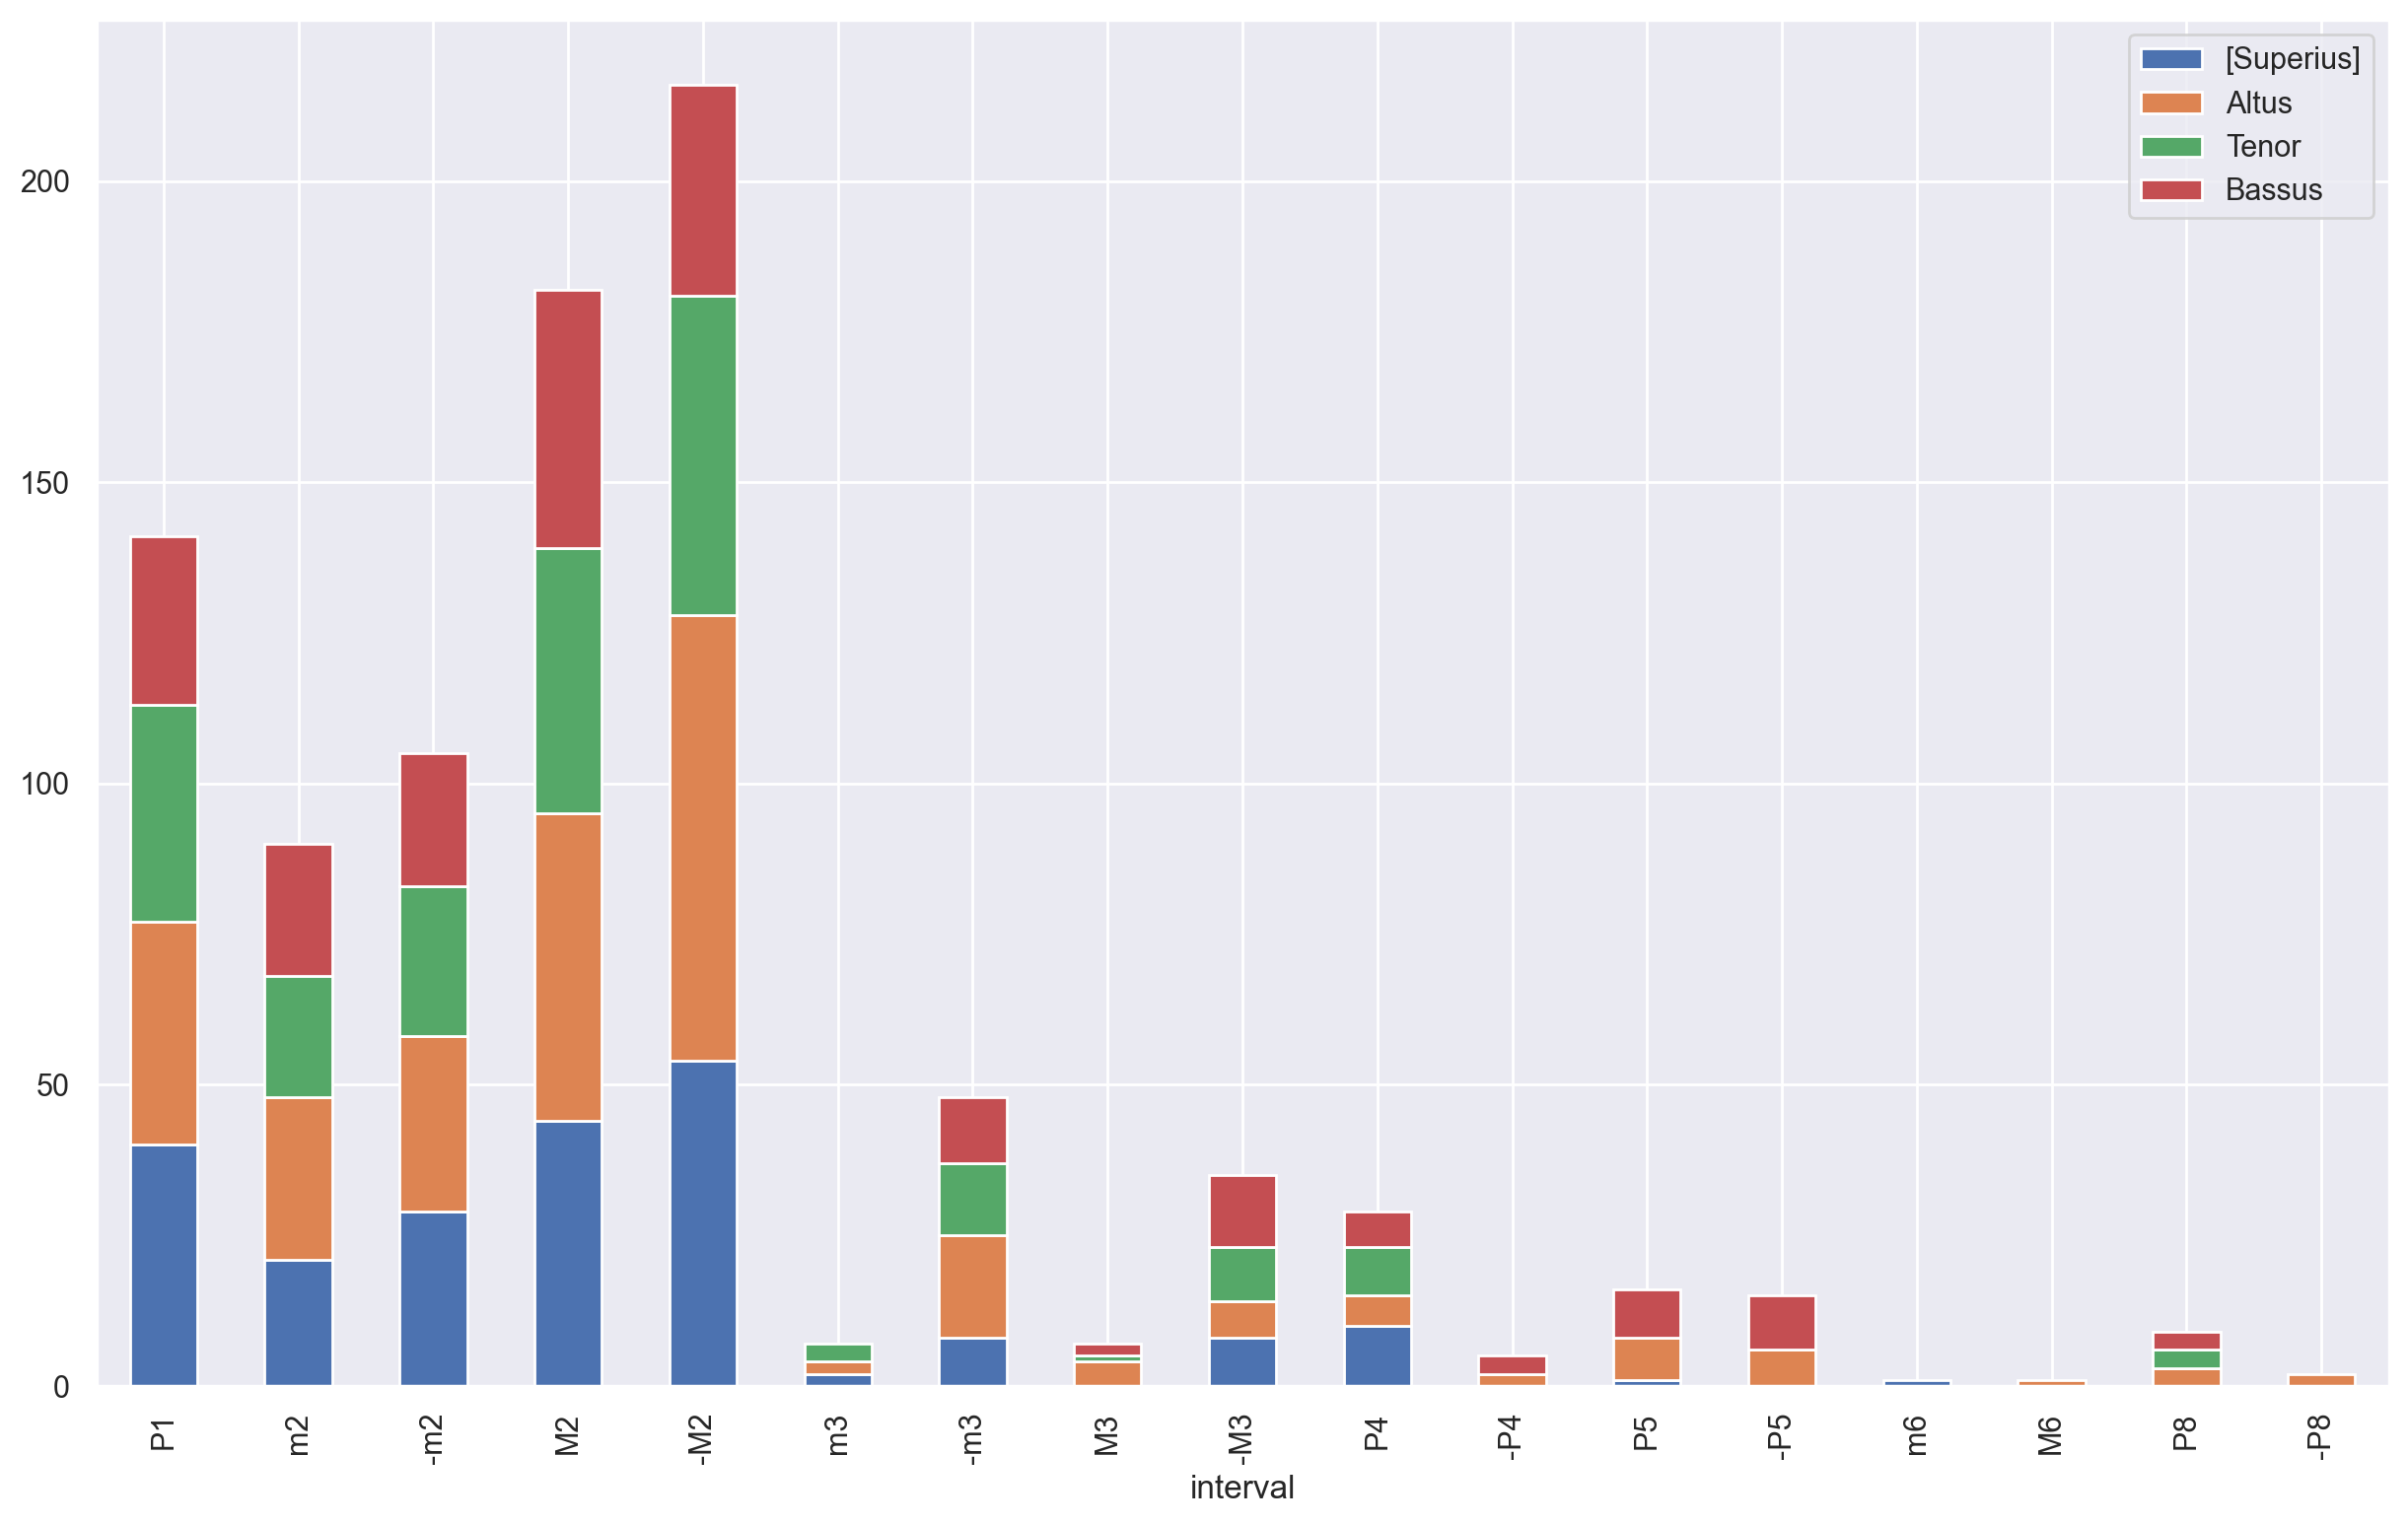

In [7]:
%matplotlib inline
int_order = ["P1", "m2", "-m2", "M2", "-M2", "m3", "-m3", "M3", "-M3", "P4", "-P4", "P5", "-P5", 
             "m6", "-m6", "M6", "-M6", "m7", "-m7", "M7", "-M7", "P8", "-P8"]

mel = piece.melodic()
mel = mel.fillna("-")

# count up the values in each item column--sum for each pitch.  
# make a copy 
mel = mel.apply(pd.Series.value_counts).fillna(0).astype(int).reset_index().copy()

# rename the index column to something more useful
mel.rename(columns = {'index':'interval'}, inplace = True)

# apply the categorical list and sort
mel['interval'] = pd.Categorical(mel["interval"], categories=int_order)
mel = mel.sort_values(by = "interval").dropna().copy()

voices = mel.columns.to_list()

# collect and print information about composer and piece
md = piece.metadata
for key, value in md.items():
    print(key, ':', value)

# set the figure size, type and colors
palette = sns.husl_palette(len(voices), l=.4)
sns.set(rc={'figure.figsize':(15,9)})
mel.set_index('interval').plot(kind='bar', stacked=True)


### C.2 Get Melodic nGrams
**Ngrams** are used in linguistics (and other fields)--they are continuous strings of characters or events, and can help us find similar **soggetti** or even predict **presentation types**.

CRIM Intervals can create **melodic** or **harmonic** nGrams.  

- These can be some **fixed length**, or up to the **maximum before the next rest**.  We set this length with the `n` (as in `n=4`; to use maximum length nGrams, use `n=-1` [negative one])

- To use the `ngrams` method, we "pass" the results of `piece.melodic()` or `piece.harmonic()` (see below) to it.  For instance we set the variable name `mel` = `piece.melodic(kind="d", compound=False)` , and then pass `mel` to the nGram method, for instance:  `piece.ngrams(df=mel, n=4)`  

- We could also combine these steps in a single line of code: 
`ngrams = piece.ngrams(df=piece.melodic(kind="d", compound=False), n=4)`
    
**All nGrams** or **Entries Only**?

- By default the melodic ngrams will be a **moving window** of whatever length 'n' is chosen.  So for n="4" we would see notes 1-4, then 2-5, then 3-6, etc as the results.  This is helpful if you would like to see **all of the substrings in a melody**.
- But other times you might want to focus on the beginnings of phrases.  This is done with **piece.entries()**, returns a dataframe that marks the first offset of any melodic pattern that starts after a rest, section break or fermata.  There are various options to refine the results, but the basic usage (for nGrams of melodic entries) would be:

```
nr = piece.notes(combineUnisons=True)
mel = piece.melodic(df=nr, kind='d', end=False)
ng = piece.ngrams(df=mel, n=3)
entries = piece.entries(df=ng)
cleaned_entries = entries.dropna(how='all').fillna('')
cleaned_entries
```


   
**Unisons--Keep or Combine?**  

- As noted above, we can use `combineUnisons=True` to remove repeated notes from nGrams.  See cell below.
    
**First or Last Offset?**

- We can index our nGrams according to where the begin or end (the former is helpful for finding Presentation Types; the latter is useful for Cadences).  Note that the offsets of melodic intervals themselves can either be marked at the start of the first note (`end=False`) or its conclusion (`end=True`).  You will need to set both in order to obtain the results you want:

```
mel = piece.melodic(df=nr, kind='d', end=False)
ng = piece.ngrams(df=mel, n=3, offsets="first)
```

**Measures and Beats?**

- We can also display **measures and beats** by passing the results to piece.detailIndex():

```
mel = piece.melodic(kind="d")
ng = piece.ngrams(df=mel, n=4)
final_ngs = piece.detailIndex(ng, offset=True)
```

**Drop NULL (NaN) values?**

- `dropna(how="all")` allows you to all rows (offsets) where all voices are silent (NaN in all parts)
- `fillna('-')` allows you to fill NaNs will any character

**Modular nGrams by Default!**

- Note that if you simply run `piece.ngrams()`, CRIM intervals will return **modular** nGrams, which represent the melodic and harmonic intervals formed among every pair of voices in the piece, like this:  `8_Held, 10_4, 6`.  See separate Notebook on these.

- And so if you are looking for nGrams that show only melodic (or harmonic, or durational, or lyric) sequences, you will first need to create a dataframe of those features, then pass that df to the ngrams method, as explained above, such as:

```
mel = piece.melodic(kind="d")
ng = piece.ngrams(df=mel, n=4)
ng
```
**Extended View?**

- Need to see more rows?
```
pd.options.display.max_rows = 999
```
    
**Read the documentation**:  `print(piece.ngrams.__doc__)`

In [32]:
# melodic ngrams

mel = piece.melodic(kind="d")
ng = piece.ngrams(df=mel, n=4)
ng

,[Superius],Altus,Tenor,Bassus
4.0,"(4, 1, 2, 2)",NaN,NaN,NaN
12.0,"(1, 2, 2, -3)",NaN,NaN,NaN
20.0,NaN,"(4, 1, 2, 2)",NaN,NaN
28.0,NaN,"(1, 2, 2, -3)",NaN,NaN
36.0,NaN,NaN,"(4, 1, 2, 2)",NaN
...,...,...,...,...
1216.0,NaN,NaN,NaN,"(-2, -2, -2, -2)"
1240.0,"(1, -2, -2, -2)","(1, 1, -3, 2)","(1, -2, 2, 2)","(8, -4, 2, -2)"
1244.0,"(-2, -2, -2, 2)","(1, -3, 2, 2)","(-2, 2, 2, -2)","(-4, 2, -2, -5)"
1248.0,"(-2, -2, 2, 1)","(-3, 2, 2, 1)","(2, 2, -2, 1)","(2, -2, -5, 1)"


In [45]:
# another example
nr = piece.notes(combineUnisons=False)
mel = piece.melodic(df=nr, kind='d', end=False)
ng = piece.ngrams(df=mel, n=3, offsets='first')
ng

,[Superius],Altus,Tenor,Bassus
0.0,"(4, 1, 2)",NaN,NaN,NaN
4.0,"(1, 2, 2)",NaN,NaN,NaN
12.0,"(2, 2, -3)",NaN,NaN,NaN
16.0,NaN,"(4, 1, 2)",NaN,NaN
20.0,NaN,"(1, 2, 2)",NaN,NaN
...,...,...,...,...
1236.0,"(1, -2, -2)","(1, 1, -3)","(1, -2, 2)","(8, -4, 2)"
1240.0,"(-2, -2, -2)","(1, -3, 2)","(-2, 2, 2)","(-4, 2, -2)"
1244.0,"(-2, -2, 2)","(-3, 2, 2)","(2, 2, -2)","(2, -2, -5)"
1248.0,"(-2, 2, 1)","(2, 2, 1)","(2, -2, 1)","(-2, -5, 1)"


In [49]:
# ngrams of the entries only

nr = piece.notes(combineUnisons=True)
mel = piece.melodic(df=nr, kind='d', end=False)
ng = piece.ngrams(df=mel, n=3)
entries = piece.entries(df=ng)
cleaned_entries = entries.dropna(how='all').fillna('')
cleaned_entries

,[Superius],Altus,Tenor,Bassus
0.0,"(4, 2, 2)",,,
16.0,,"(4, 2, 2)",,
32.0,,,"(4, 2, 2)",
48.0,,,,"(4, 2, 2)"
56.0,"(-2, -2, -2)",,,
...,...,...,...,...
1148.0,,,"(-2, -2, 2)",
1156.0,,,,"(-3, 4, -2)"
1158.0,,"(-2, -2, -2)",,
1200.0,"(2, 2, 2)",,"(-2, -2, 2)","(5, -2, -2)"



We can also display **measure+beat addresses**

*  The results of the previous **ngram** method are now 'passed' to the **detailIndex** method

In [50]:
mel = piece.melodic(kind="d")
ng = piece.ngrams(df=mel, n=4)
final_ngs = piece.detailIndex(ng, offset=True)
final_ngs

[Superius]          Altus           Tenor  \
Measure Beat Offset                                                   
1       3.0  4.0        (4, 1, 2, 2)            NaN             NaN   
2       3.0  12.0      (1, 2, 2, -3)            NaN             NaN   
3       3.0  20.0                NaN   (4, 1, 2, 2)             NaN   
4       3.0  28.0                NaN  (1, 2, 2, -3)             NaN   
5       3.0  36.0                NaN            NaN    (4, 1, 2, 2)   
...                              ...            ...             ...   
145     1.0  1216.0              NaN            NaN             NaN   
148     1.0  1240.0  (1, -2, -2, -2)  (1, 1, -3, 2)   (1, -2, 2, 2)   
        3.0  1244.0  (-2, -2, -2, 2)  (1, -3, 2, 2)  (-2, 2, 2, -2)   
149     1.0  1248.0   (-2, -2, 2, 1)  (-3, 2, 2, 1)   (2, 2, -2, 1)   
        3.0  1252.0              NaN   (2, 2, 1, 1)             NaN   

                               Bassus  
Measure Beat Offset                    
1       3.0  4.0                  NaN  
2       3.0  12.0                 NaN  
3       3.0  20.0                 NaN  
4       3.0  28.0                 NaN  
5       3.0  36.0                 NaN  
...                               ...  
145     1.0  1216.0  (-2, -2, -2, -2)  
148     1.0  1240.0    (8, -4, 2, -2)  
        3.0  1244.0   (-4, 2, -2, -5)  
149     1.0  1248.0    (2, -2, -5, 1)  
        3.0  1252.0               NaN  

[415 rows x 4 columns]

### C.3 Count nGrams

```mel = piece.melodic(kind="d")
ng = piece.ngrams(df=mel, n=4)
ng.stack().value_counts().to_frame()
```

In [54]:
mel = piece.melodic(kind="d")
ng = piece.ngrams(df=mel, n=4)
ng.stack().value_counts().to_frame()

,0
"(-2, -2, -2, -2)",34
"(2, -2, -2, -2)",26
"(-2, -2, -2, 2)",20
"(1, 2, -2, -2)",13
"(1, 1, 2, -2)",12
...,...
"(-2, 2, -4, 2)",1
"(4, 1, -5, 1)",1
"(2, 5, 2, 1)",1
"(-3, -2, 4, 2)",1


### C.4 Search for Melodic nGrams

Here we can use Python tools to **search for any given 'string' of intervals**, and highlight them in the resulting data frame.

- Note that we can also search at any given **regular time unit** (such as every 2 offsets = half note)
- To do this we just add `unit=n` to the `getNgrams` request
- We can also select to display as offsets or measures/beats
    
Use the boxes below to **interact** with the code without needing to write it!

-  `search_pattern` returns any nGram with the interval sequence you use.  Include comma and space after each interval.
- `kind` selects **quality**, **diatonic**, **chromatic**, or **zero**
- `compound` will be **true** or **false**
-`length` is the **length** of the `nGram` (three intervals is of course four notes); use `-1` for maximum length before any given rest.
- `style` determines whether the results are listed by **offset** or **measure + beat**
- `endpoint` determines whether the offset (or measure + beat) represents **first note** of the pattern or the **last**.  



Sample search for **Model_0008**:  `4, 1, 2, 2, -3`  (use `kind="d"` and `length=5`)


- Notice the regular time intervals between identical nGrams--the **classifier** can use this to predict presentation types.

In [55]:
def convertTuple(tup):
    out = ""
    if isinstance(tup, tuple):
        out = ', '.join(tup)
    return out
@interact
def get_ngrams(search_pattern="", kind=["d", "q", "c", "z"], unisons=[False, True], compound=[True, False], length=[2, 3, 4, 5, 6], endpoint=["first", "last"]):
    nr = piece.notes(combineUnisons=unisons)
    ngrams = piece.ngrams(df=piece.melodic(df=nr, kind=kind), n=length, offsets=endpoint)
    ngrams = ngrams.applymap(convertTuple)
    mask = ngrams.apply(lambda x: x.apply(str).str.contains(search_pattern).any(), axis=1)

    filtered_ngrams = ngrams[mask].copy()
    filtered_ngrams.astype(str).copy
    
    beats_measures_mel = piece.detailIndex(filtered_ngrams, offset=True)

    return beats_measures_mel.fillna("-").applymap(str).style.applymap(lambda x: "background: #ccebc5" if re.search(search_pattern, x) else "")

    

interactive(children=(Text(value='', description='search_pattern'), Dropdown(description='kind', options=('d',…

## D. Harmonic Intervals and nGrams

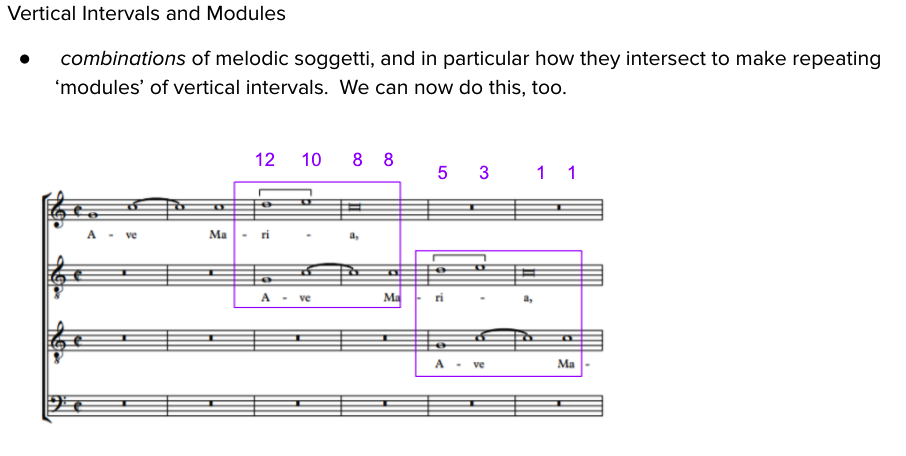

In [16]:
# Read the Documentation:  
print(ImportedPiece.harmonic.__doc__)


        Return harmonic intervals for all voice pairs. The voice pairs are
        named with the voice that's lower on the staff given first, and the two
        voices separated with an underscore, e.g. "Bassus_Tenor".

        :param str kind: use "q" (default) for diatonic intervals with quality,
            "d" for diatonic intervals without quality, "z" for zero-indexed
            diatonic intervals without quality (i.e. unison = 0, second = 1,
            etc.), or "c" for chromatic intervals. Only the first character is
            used, and it's case insensitive.
        :param bool directed: defaults to True which shows that the voice that
            is lower on the staff is a higher pitch than the voice that is
            higher on the staff. This is desginated with a "-" prefix.
        :param bool compound: whether to use compound (True, default) or simple
            (False) intervals. In the case of simple diatonic intervals, it
            simplifies to within the o

### D.1 Harmonic Intervals

* Specify **kind** as above (`q`, `d`, `c`, `z`)
* Choose **compound** (`=True`) or **simple** (`=False`)
* For example:  **`piece.harmonic(kind="d", compound=True)`**

**Fill and Drop NaN values?**

- dropna(how="all") allows you to all rows (offsets) where all voices are silent (NaN in all parts)
- fillna('-') allows you to fill NaNs will any character. For example:  

```
piece.harmonic(kind="d", compound=True).fillna('-')
```


In [56]:
harm = piece.harmonic(kind="c", compound=False).fillna("")
piece.detailIndex(harm, offset=True)


Bassus_Tenor Bassus_Altus Bassus_[Superius] Tenor_Altus  \
Measure Beat Offset                                                           
1       1.0  0.0            Rest         Rest              Rest        Rest   
        3.0  4.0                                           Rest               
2       3.0  8.0            Rest         Rest              Rest        Rest   
             12.0                                          Rest               
3       1.0  16.0           Rest         Rest              Rest        Rest   
...                          ...          ...               ...         ...   
149     1.0  1248.0            3            7                 3           4   
        3.0  1252.0                         8                             5   
150     1.0  1256.0            7            0                 4           5   
151     1.0  1272.0            0            7                 0           7   
152     1.0  1288.0            0            7                 0           7   

                    Tenor_[Superius] Altus_[Superius]  
Measure Beat Offset                                    
1       1.0  0.0                Rest             Rest  
        3.0  4.0                Rest             Rest  
2       3.0  8.0                Rest             Rest  
             12.0               Rest             Rest  
3       1.0  16.0               Rest                7  
...                              ...              ...  
149     1.0  1248.0                0                8  
        3.0  1252.0                                 7  
150     1.0  1256.0                9                4  
151     1.0  1272.0                0                5  
152     1.0  1288.0                0                5  

[553 rows x 6 columns]

### D.2 Harmonic NGrams

**Harmonic nGrams** 

- CRIM Intervals can create **harmonic** nGrams.  These can be some **fixed length**, or up to the **maximum before the next rest**.  We set this length with the `n` (as in `n=4`; to use maximum length nGrams, use `n=-1` [negative one])

- To use the `ngrams` method, we "pass" the results of `piece.harmonic()` to it.  For instance 

```
har = piece.harmonic(kind="d", compound=False) 
piece.ngrams(df=har, n=4)
```

-  We could also combine these steps in a single line of code: 

```
ngrams = piece.ngrams(df=piece.harmonic(kind="d", compound=False), n=4)
```
   
**No Unisons?** 

-  As noted above, we can use `combineUnisons=True` to remove repeated notes from nGrams.  See cell below.
    
**Drop NULL (NaN) values?**

-  `dropna(how="all")` allows you to all rows (offsets) where all voices are silent (NaN in all parts)
-  `fillna('-')` allows you to fill NaNs will any character

**Real Durations or Regularized?**

- By default the ngrams will follow the real durations of the melody.  But it is also possible to **sample by any durational increment**.  For instance `piece.ngrams(unit='2')` will return ngrams based on every half-note (semibreve)

In [57]:
har = piece.harmonic(kind="d", compound=False)
piece.ngrams(df=har, n=4).fillna('-')

,Bassus_Tenor,Bassus_Altus,Bassus_[Superius],Tenor_Altus,Tenor_[Superius],Altus_[Superius]
16.0,-,-,-,-,-,"(5, 3, 8, 8)"
32.0,-,-,-,"(5, 3, 1, 1)",-,-
48.0,"(5, 3, 8, 8)",-,-,-,-,-
56.0,-,-,"(8, 8, 7, 5)",-,-,-
60.0,-,-,"(8, 7, 5, 3)",-,-,-
...,...,...,...,...,...,...
1236.0,"(8, 1, 3, 3)","(5, 5, 8, 5)","(3, 3, 5, 3)","(5, 5, 6, 3)","(3, 3, 3, 8)","(6, 6, 5, 6)"
1240.0,"(1, 3, 3, 5)","(5, 8, 5, 6)","(3, 5, 3, 3)","(5, 6, 3, 4)","(3, 3, 8, 6)","(6, 5, 6, 5)"
1244.0,"(3, 3, 5, 8)","(8, 5, 6, 8)","(5, 3, 3, 8)","(6, 3, 4, 4)","(3, 8, 6, 8)","(5, 6, 5, 3)"
1248.0,"(3, 5, 8, 8)","(5, 6, 8, 5)","(3, 3, 8, 8)","(3, 4, 4, 5)","(8, 6, 8, 8)","(6, 5, 3, 4)"


### D.3  Search Harmonic nGrams


* See Section **C.4** for explanation of the interactive search.

* Examples:

* Two patterns: `12, 10, 8, 8|5, 3, 1, 1`

* Authentic cadence with 6>8 or 3>1 motion:  `7, 6, 8|2, 3, 1`
 
* Plagal cadence:  `6, 6, 6` at the same time we also see `5, 3, 5` in another pair of voices.  Currently it is not possible to search for both at the same time.


In [19]:
def _convertTuple(tup):
    out = ""
    if isinstance(tup, tuple):
        out = ', '.join(tup)
    return out
@interact
def get_ngrams(search_pattern="", kind=["d", "q", "c", "z"], compound=[True, False], length=[2, 3, 4, 5, 6], endpoint=["first", "last"]):
    ngrams = piece.ngrams(df=piece.harmonic(kind=kind, compound=compound), n=length, offsets=endpoint)
    ngrams = ngrams.applymap(_convertTuple)
    mask = ngrams.apply(lambda x: x.apply(str).str.contains(search_pattern).any(), axis=1)

    filtered_ngrams = ngrams[mask].copy()
    filtered_ngrams.astype(str).copy
    
    beats_measures_har = piece.detailIndex(filtered_ngrams, offset=True)

    return beats_measures_har.fillna("-").applymap(str).style.applymap(lambda x: "background: #ccebc5" if re.search(search_pattern, x) else "")

      

interactive(children=(Text(value='', description='search_pattern'), Dropdown(description='kind', options=('d',…